In [1]:
import math
import torch
import gpytorch
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import GPE_ensemble as GPE

from GPErks.gp.data.dataset import Dataset

from sklearn.model_selection import train_test_split

%matplotlib inline
%load_ext autoreload
%autoreload 2

# set logger and enforce reproducibility
from GPErks.log.logger import get_logger
from GPErks.utils.random import set_seed
log = get_logger()
seed = 8
set_seed(seed)

# Model 1: Basic GP

In [2]:
mode_weights = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\modes_weights.csv',index_col=0,delim_whitespace=False,header=0)

In [3]:
mode_weights

,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9,Mode10,Mode11,Mode12,Mode13,Mode14,Mode15,Mode16,Mode17,Mode18
Mesh_ID,,,,,,,,,,,,,,,,,,
1,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,0.175002,23.694737,3.505879,0.634389,5.188583,0.952835,-1.595273,1.443640,-0.904097,-1.312873,-0.395244
2,-16.902798,23.644504,19.452896,-24.329813,-25.447350,20.415574,-8.318264,-11.552292,4.878743,-0.590770,0.058564,-5.180545,0.202458,5.183101,1.159655,-4.124027,-1.797792,1.839387
3,14.528402,16.328970,-5.269040,31.653975,7.173021,17.494031,-1.362727,-2.515712,3.296703,-3.384570,6.019192,6.381015,12.668005,2.272989,-7.823127,-3.264168,-0.556074,-3.457493
4,-15.076964,28.889168,8.644859,4.758042,1.301095,5.983310,-12.741057,29.428944,0.900375,-3.117595,5.360741,-4.384879,-5.052080,-0.322429,1.764566,0.281199,0.379901,1.411104
5,-3.839848,-47.723637,7.042452,-4.914959,-4.014415,20.366371,1.061045,3.789887,-4.468229,4.581192,-5.260154,-1.138816,0.222769,-9.960540,-3.465097,8.679472,-5.080536,-3.130734
6,18.372208,-13.173184,-10.191443,-24.148353,5.156296,-5.613573,5.256249,6.128060,2.273913,-3.308190,-1.089152,5.115009,-2.514505,15.535679,-6.383510,4.925573,-2.114735,-5.143046
7,-34.355273,-16.804885,-6.838693,-12.785964,5.546781,-11.206395,-10.998304,2.434263,-4.587426,1.445966,-7.883546,-10.294014,11.979958,-1.239739,-1.025227,-5.488834,6.809864,-5.501627
8,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667,-9.300747,-1.650785,-11.269317,3.099298,4.335249,5.748891,3.315503,-8.408521,3.104817
9,23.260333,-15.185501,34.509394,-5.474826,-7.066281,-10.593615,5.997680,0.089632,-18.393991,4.721930,14.410537,1.322375,0.474351,-0.843182,-6.305262,-3.498095,1.827012,3.739217


In [4]:
mode_weights=mode_weights.drop(15,axis=0)
#mode_weights=mode_weights.drop(14,axis=0)

In [5]:
meshes=['01','02','03','04','05','06','07','08','09','10','11','12','13','14','16','17','18','19']

In [6]:
pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+meshes[0]+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values

array([[0.487005, 0.321104, 6.56834 , 0.799039, 0.47051 , 5.04917 ],
       [0.649337, 0.34538 , 4.40605 , 0.311586, 0.313059, 4.37368 ],
       [0.666146, 0.43197 , 7.48917 , 0.996915, 0.20351 , 3.88357 ],
       ...,
       [0.659101, 0.299998, 1.80109 , 0.605964, 0.456326, 1.19854 ],
       [0.597605, 0.258533, 4.64056 , 0.54075 , 0.336259, 5.12383 ],
       [0.639472, 0.344217, 2.96581 , 0.654483, 0.385298, 3.01703 ]])

In [7]:
mode_weights.iloc[2,:]

Mode1     14.528402
Mode2     16.328970
Mode3     -5.269040
Mode4     31.653975
Mode5      7.173021
Mode6     17.494031
Mode7     -1.362727
Mode8     -2.515712
Mode9      3.296703
Mode10    -3.384570
Mode11     6.019192
Mode12     6.381015
Mode13    12.668005
Mode14     2.272989
Mode15    -7.823127
Mode16    -3.264168
Mode17    -0.556074
Mode18    -3.457493
Name: 3, dtype: float64

In [8]:
mode_weights.iloc[0,:].values.shape[0]

18

In [9]:
x_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\input\xlabels_EP.txt',delim_whitespace=True,header=None)
x_labels=x_labels.values.flatten().tolist()+mode_weights.columns.tolist()

In [10]:
y_labels=pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\EP_healthy\output\ylabels.txt',delim_whitespace=True,header=None)

In [11]:
all_input = []
all_output=[]
for i in range(len(meshes)):
    val=meshes[i]
    
    inputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/X_EP.txt",index_col=None,delim_whitespace=True,header=None).values
    outputData = pd.read_csv("/Users/pmzcwl/Documents/GitHub/Calibration/shared_simulations/EP_healthy/"+val+"/Y.txt",index_col=None,delim_whitespace=True,header=None).values
    modeweights = np.tile(mode_weights.iloc[i,:].values, (inputData.shape[0],1))
    input_modes = np.concatenate((inputData,modeweights),axis=1)
    all_input.append(pd.DataFrame(input_modes))
    all_output.append(pd.DataFrame(outputData))
    print(val)
    print(np.max(outputData))
all_input=pd.concat(all_input)
all_output=pd.concat(all_output)
all_input.columns=x_labels
all_output.columns=y_labels

01
406.703
02
317.407
03
332.914
04
309.14
05
277.849
06
296.377
07
355.546
08
283.103
09
391.145
10
439.316
11
348.01
12
292.465
13
301.222
14
325.678
16
297.968
17
317.709
18
297.346
19
312.492


In [12]:
all_input.iloc[:,0:15]

,CV_ventricles,k_ventricles,k_FEC,CV_atria,k_atria,k_BB,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9
0,0.487005,0.321104,6.56834,0.799039,0.470510,5.04917,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,0.175002,23.694737
1,0.649337,0.345380,4.40605,0.311586,0.313059,4.37368,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,0.175002,23.694737
2,0.666146,0.431970,7.48917,0.996915,0.203510,3.88357,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,0.175002,23.694737
3,0.564330,0.319989,4.09474,0.680346,0.313557,3.05286,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,0.175002,23.694737
4,0.519419,0.363704,6.37449,0.538744,0.226915,2.15749,-26.526282,-21.987510,45.298672,6.964297,1.264487,-14.710058,2.926209,0.175002,23.694737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.551498,0.388318,6.33609,0.443136,0.264851,2.16637,4.180448,-2.934129,-30.660672,-2.925176,5.912715,-10.612089,-16.116077,-7.741425,2.581669
176,0.696777,0.428245,4.76957,0.579106,0.298336,2.58142,4.180448,-2.934129,-30.660672,-2.925176,5.912715,-10.612089,-16.116077,-7.741425,2.581669
177,0.463684,0.476077,3.01936,0.492061,0.269474,4.46090,4.180448,-2.934129,-30.660672,-2.925176,5.912715,-10.612089,-16.116077,-7.741425,2.581669
178,0.468228,0.232701,7.07609,0.601255,0.463201,1.73743,4.180448,-2.934129,-30.660672,-2.925176,5.912715,-10.612089,-16.116077,-7.741425,2.581669


In [13]:
all_output

,"(A_TAT,)","(V_TAT,)"
0,121.882,121.3370
1,344.083,90.1192
2,121.510,81.1778
3,165.531,106.5830
4,235.617,109.6840
...,...,...
175,176.356,92.8057
176,125.999,72.0106
177,133.840,108.4860
178,126.525,128.3320


In [14]:
new_mode_weights = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\shape_EP\X_shape.txt',delim_whitespace=True,header=None)

In [15]:
new_EP = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\shape_EP\X_EP.txt',delim_whitespace=True,header=None)

In [16]:
new_Y = pd.read_csv(r'C:\Users\pmzcwl\Documents\GitHub\Calibration\shared_simulations\shape_EP\Y.txt',delim_whitespace=True,header=None)

In [17]:
new_X = pd.DataFrame(np.concatenate((new_EP,new_mode_weights),axis=1))

In [18]:
x_labels

['CV_ventricles',
 'k_ventricles',
 'k_FEC',
 'CV_atria',
 'k_atria',
 'k_BB',
 'Mode1',
 'Mode2',
 'Mode3',
 'Mode4',
 'Mode5',
 'Mode6',
 'Mode7',
 'Mode8',
 'Mode9',
 'Mode10',
 'Mode11',
 'Mode12',
 'Mode13',
 'Mode14',
 'Mode15',
 'Mode16',
 'Mode17',
 'Mode18']

In [19]:
new_X.columns=x_labels[0:15]
new_Y.columns=y_labels

In [20]:
# convert all columns to numeric format
new_Y = new_Y.apply(pd.to_numeric, errors='coerce')

# identify non-numeric rows
non_numeric_rows = new_Y.isnull().any(axis=1)
non_numeric_rows=non_numeric_rows[non_numeric_rows==1]

In [21]:
non_numeric_rows.index

Index([ 16,  29,  53,  54,  67,  74,  86,  97, 101, 116, 137, 177, 180, 185,
       190, 210, 215, 232, 255, 260, 263, 273, 290],
      dtype='int64')

In [22]:
new_Y.shape

(300, 2)

In [23]:
new_X.shape

(300, 15)

In [24]:
new_Y=new_Y.drop(non_numeric_rows.index)

In [25]:
new_X=new_X.drop(non_numeric_rows.index)

In [26]:
new_Y.shape

(277, 2)

In [27]:
new_X.shape

(277, 15)

In [28]:
new_Y.shape[0]

277

In [29]:
all_input.iloc[0:new_Y.shape[0],0:15].shape

(277, 15)

In [30]:
# split original dataset in training, validation and testing sets
X=all_input.iloc[:,0:15]
y=all_output

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=seed
)

In [31]:
GPE_mesh_original = GPE.ensemble(X_train,y_train,mean_func="linear",training_iter=500)

0
1


TestExperiment dataset loaded.
Notes from the author:
"An example dataset to test GPErks' power!"
Dataset properties:
-Input size: 4
-Input parameters: ['Mode1', 'Mode2', 'Mode3', 'Mode4']
-Output size: 1
-Output feature: [array(['A_TAT'], dtype=object)]
-Sample size: 3240
-Discrepancy: 0.0519
-Validation data available: No
-Testing data available: No


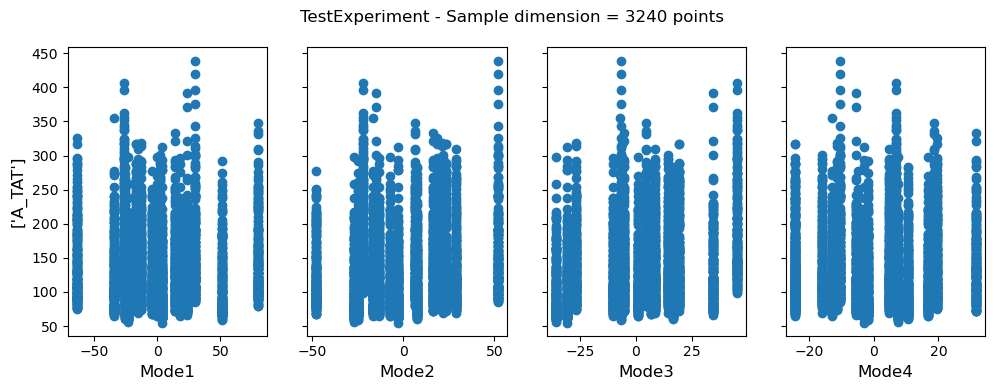

In [32]:
start=6
end=10
dataset = Dataset(
        all_input.values[:,start:end],
        all_output.iloc[:,0].values,
        x_labels=x_labels[start:end],
        y_label=y_labels.values[0],
    
        )
dataset.plot()

In [33]:
GPE_mesh_original.MSE(X_test,y_test)

tensor([5.1252, 1.8585], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [34]:
GPE_mesh_original.R2(X_test,y_test)

tensor([0.9986, 0.9974], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [35]:
GPE_mesh_original.ISE(X_test,y_test)

tensor([94.5988, 96.7593])

In [36]:
GPE_mesh_original.MSE(new_X.iloc[0:new_Y.shape[0],:],new_Y)

tensor([1799.7102,  486.8333], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [37]:
GPE_mesh_original.R2(new_X.iloc[0:new_Y.shape[0],:],new_Y)

tensor([0.5233, 0.5015], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [38]:

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
    new_X.iloc[0:new_Y.shape[0],:],
    new_Y,
    test_size=0.2,
    random_state=seed
)

In [39]:
new_GPE_mesh_original = GPE.ensemble(new_X_train.iloc[:,0:15],new_y_train,mean_func="linear",training_iter=500)

0
1


In [40]:
new_GPE_mesh_original.R2(new_X_test.iloc[:,0:15],new_y_test)

tensor([0.9587, 0.8483], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [41]:
new_GPE_mesh_original.ISE(new_X_test.iloc[:,0:15],new_y_test)

tensor([94.6429, 96.4286])

In [42]:
new_GPE_mesh_original.R2(all_input.iloc[:,0:15],all_output)

tensor([0.9051, 0.8820], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [43]:
all_input.iloc[i,0:15]

CV_ventricles     0.400604
k_ventricles      0.306568
k_FEC             3.429150
CV_atria          0.624145
k_atria           0.235757
k_BB              5.611310
Mode1           -26.526282
Mode2           -21.987510
Mode3            45.298672
Mode4             6.964297
Mode5             1.264487
Mode6           -14.710058
Mode7             2.926209
Mode8             0.175002
Mode9            23.694737
Name: 17, dtype: float64

In [44]:
distance = np.zeros(all_input.shape[0])
error = np.zeros((all_input.shape[0],2))
for i in range(all_input.shape[0]):
    error[i]=new_GPE_mesh_original.MSE(all_input.iloc[i:i+1,0:15],all_output.iloc[[i]]).detach().numpy() 
    distance[i] = np.min(np.sum((all_input.iloc[i,6:7]-new_X_train.iloc[:,6:7])**2,axis=1)/1)

In [45]:
y_labels

,0
0,A_TAT
1,V_TAT


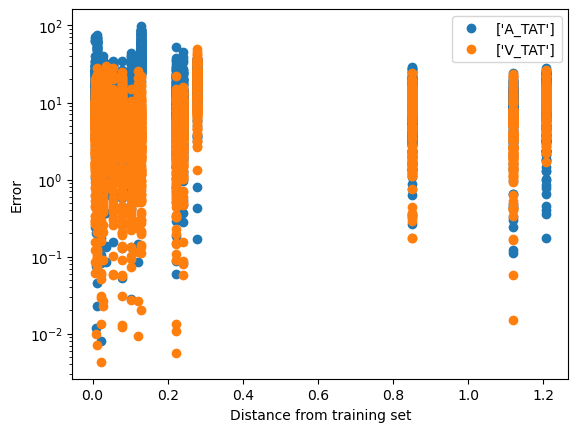

In [46]:
plt.plot(distance,np.sqrt(error),'o')
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('Distance from training set')
plt.legend(y_labels.values)

TestExperiment dataset loaded.
Notes from the author:
"An example dataset to test GPErks' power!"
Dataset properties:
-Input size: 6
-Input parameters: ['CV_ventricles', 'k_ventricles', 'k_FEC', 'CV_atria', 'k_atria', 'k_BB']
-Output size: 1
-Output feature: [array(['V_TAT'], dtype=object)]
-Sample size: 3240
-Discrepancy: 0.0002
-Validation data available: No
-Testing data available: No


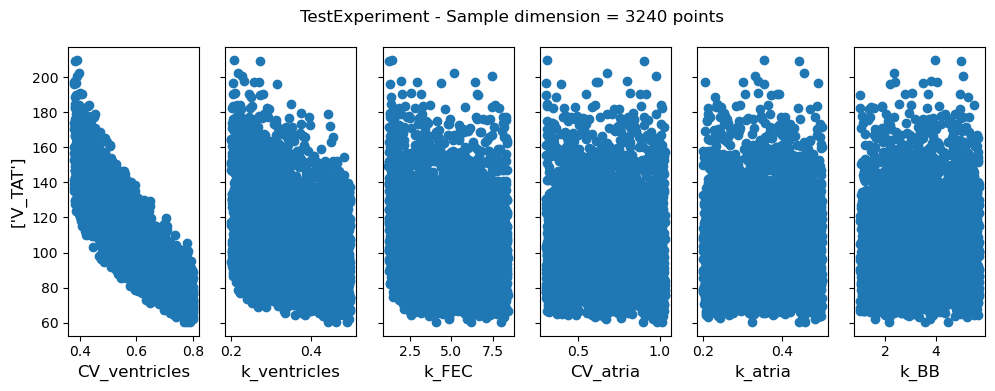

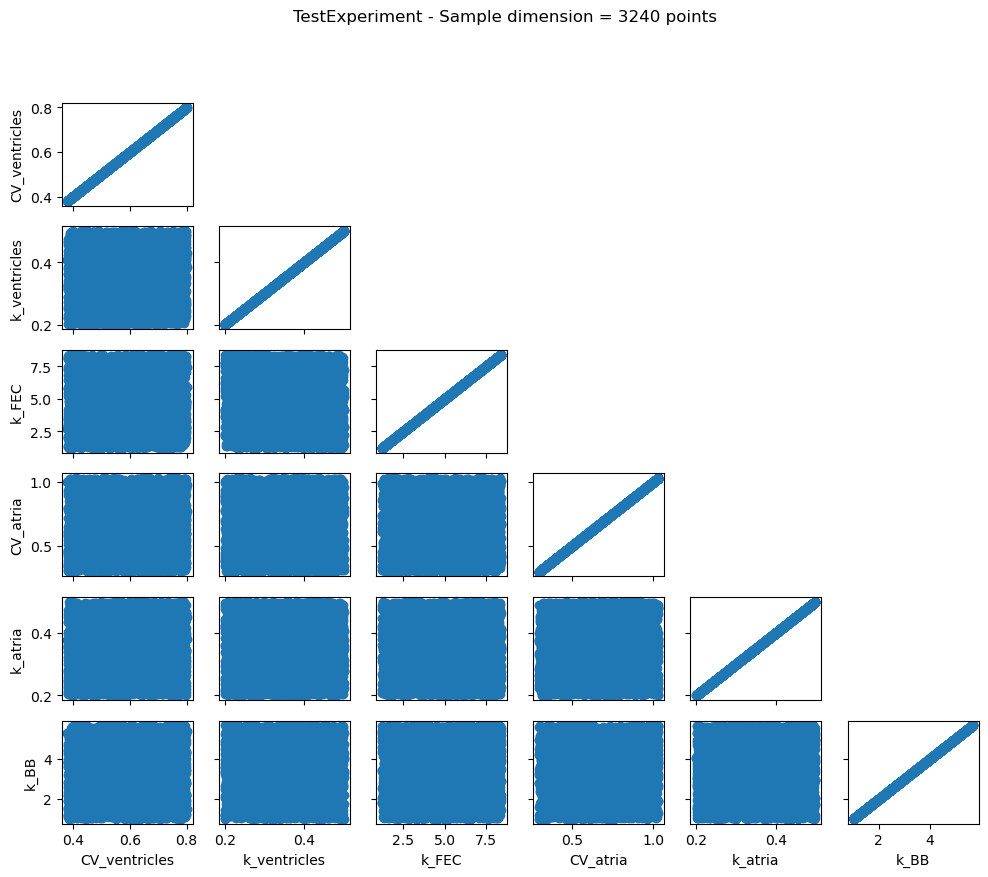

In [47]:
dataset = Dataset(
        all_input.iloc[:,0:6].values,
        all_output.iloc[:,1].values,
        x_labels=x_labels[0:6],
        y_label=y_labels.values[1],
    
        )
dataset.plot()
dataset.plot_pairwise()

TestExperiment dataset loaded.
Notes from the author:
"An example dataset to test GPErks' power!"
Dataset properties:
-Input size: 6
-Input parameters: ['CV_ventricles', 'k_ventricles', 'k_FEC', 'CV_atria', 'k_atria', 'k_BB']
-Output size: 1
-Output feature: [array(['A_TAT'], dtype=object)]
-Sample size: 277
-Discrepancy: 0.0033
-Validation data available: No
-Testing data available: No


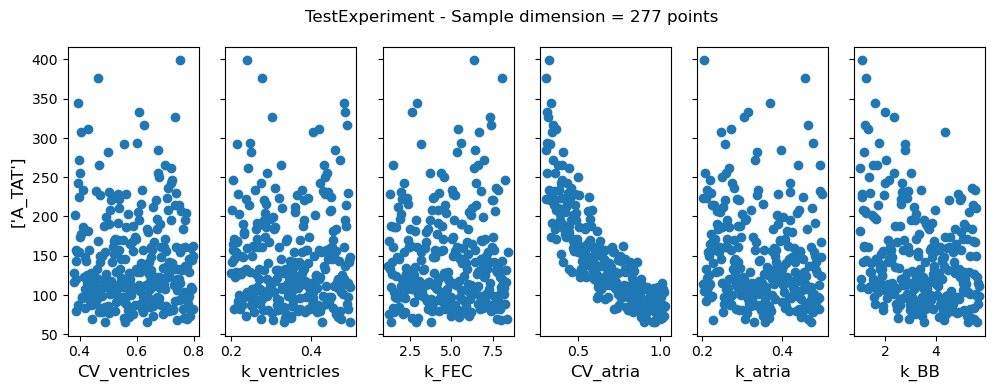

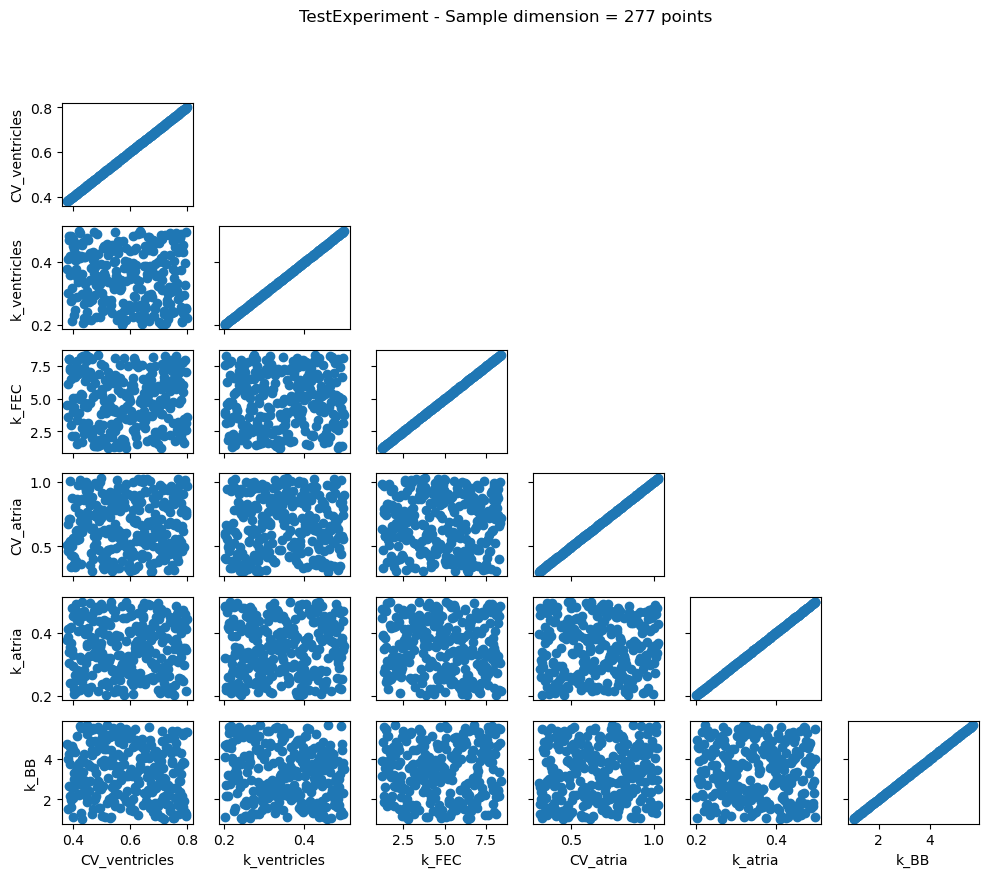

In [48]:
dataset = Dataset(
        new_X[0:new_Y.shape[0]].iloc[:,0:6].values,
        new_Y.iloc[:,0].values,
        x_labels=x_labels[0:6],
        y_label=y_labels.values[0],
    
        )
dataset.plot()
dataset.plot_pairwise()

In [49]:
new_Y

,"(A_TAT,)","(V_TAT,)"
0,180.555,102.238
1,86.635,162.502
2,119.854,73.791
3,160.999,155.599
4,196.323,111.628
...,...,...
295,128.684,98.196
296,157.412,89.573
297,141.074,101.181
298,107.867,91.571


In [50]:
new_Y[new_Y.iloc[:,0]>250]

,"(A_TAT,)","(V_TAT,)"
10,271.628,140.150
17,316.232,92.839
36,282.184,142.409
42,311.835,142.270
46,327.291,76.948
51,255.117,89.127
108,376.466,128.922
141,255.516,144.131
145,284.923,84.600
156,265.367,122.635


In [51]:
new_Y.shape[0]

277

In [52]:
MSE=np.zeros((new_Y.shape[0],2))
for i in range(new_Y.shape[0]):
    new_X2=new_X.iloc[0:new_Y.shape[0],:].copy().drop(new_Y.index[i])
    new_Y2 = new_Y.copy().drop(new_Y.index[i])
    new_GPE_mesh_original2 = GPE.ensemble(new_X2,new_Y2,mean_func="linear",training_iter=500)
    MSE[i]=(new_GPE_mesh_original2.MSE(new_X.loc[[new_Y.index[i]]],new_Y.loc[[new_Y.index[i]]])).detach().numpy()
    print(MSE[i])

0
1
[721.67972321  27.84495113]
0
1
[ 6.73756698 21.65794465]
0
1
[ 2.39765132 65.41594344]
0
1
[ 28.50587124 283.00912327]
0
1
[51.74993544 45.41911616]
0
1
[222.37411878  27.60434925]
0
1
[0.20581817 0.78258234]
0
1
[33.23923219 46.22348292]
0
1
[ 32.29786329 226.22233923]
0
1
[2.07455636e-02 1.00660064e+02]
0
1
[ 2.49310916 22.84205784]
0
1
[49.37584859  1.63684037]
0
1
[42.10316369  5.93331783]
0
1
[  2.48331392 455.0651739 ]
0
1
[32.0176055   3.30812731]
0
1
[  5.0623591  188.42163471]
0
1
[1.74424204e+02 8.35589285e-02]
0
1
[131.82777711 210.34018685]
0
1
[115.93150125  29.89313644]
0
1
[20.02538683  5.62832242]
0
1
[1419.5864772     1.53986892]
0
1
[429.65305576  45.5325658 ]
0
1
[159.97291065  26.46531946]
0
1
[  9.87438715 315.98084235]
0
1
[ 87.42153213 292.35626438]
0
1
[ 2.15917697 74.38803394]
0
1
[218.44293331  69.03556998]
0
1
[ 0.45884185 39.41298589]
0
1
[ 6.69484419 75.47401368]
0
1
[28.36829019 92.52860847]
0
1
[3.27454427 0.18716524]
0
1
[76.69548784 45.43866507]
0


1
[17.47986887  2.16448488]
0
1
[16.29784997 32.39231353]
0
1
[28.78496053  2.10581266]
0
1
[   3.2395131  1574.93337793]
0
1
[ 6.64816368 48.3840238 ]
0
1
[14.59453064  1.58107171]
0
1
[243.50813875  61.64887392]
0
1
[18.41011445  7.3805339 ]
0
1
[548.79808833  92.6020409 ]
0
1
[ 0.14814248 11.38228214]
0
1
[52.82396595  0.73870752]
0
1
[26.61867426 21.34665197]


In [53]:
np.argmax(MSE,axis=0)

array([188,  58], dtype=int64)

In [54]:
MSE[58]

array([  109.20627846, 27232.18413721])

In [55]:
new_X.iloc[58]

CV_ventricles      0.467206
k_ventricles       0.415973
k_FEC              2.221350
CV_atria           0.885963
k_atria            0.364775
k_BB               4.441280
Mode1            114.217000
Mode2            -69.827500
Mode3            -17.988500
Mode4            -14.485100
Mode5             14.347300
Mode6              4.415180
Mode7             -9.500420
Mode8            -11.207400
Mode9             33.455900
Name: 62, dtype: float64

In [56]:
new_Y.iloc[58]

(A_TAT,)     77.918
(V_TAT,)    284.462
Name: 62, dtype: float64

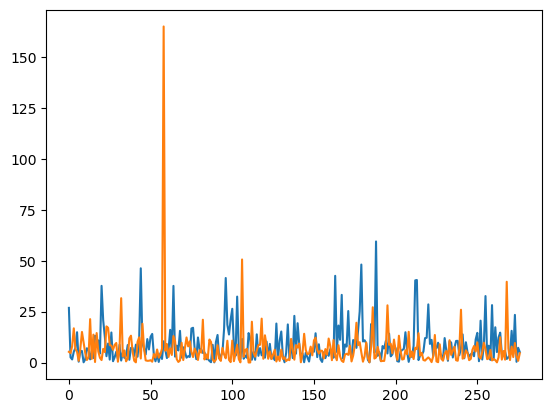

In [57]:
plt.plot(np.sqrt(MSE))

In [58]:
np.std(new_Y)

(A_TAT,)    61.444822
(V_TAT,)    31.250671
dtype: float64

In [59]:
np.max(new_X)

115.841

In [60]:
new_Y.shape[0]-new_Y.shape[0]%15

270

In [61]:
new_Y.shape[0]

277

In [62]:
np.floor(new_Y.shape[0]/15)

18.0

In [63]:
x = np.linspace(15,new_y_train.shape[0]-new_y_train.shape[0]%15,int(np.floor(new_y_train.shape[0]/15)))

In [64]:
x

array([ 15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150., 165.,
       180., 195., 210.])

In [66]:
MSE=np.zeros((int(np.floor(new_y_train.shape[0]/15)),2))
R2=np.zeros((int(np.floor(new_y_train.shape[0]/15)),2))
x = np.linspace(15,new_y_train.shape[0]-new_y_train.shape[0]%15-15,int(np.floor(new_Y.shape[0]/15)))
for i in range(int(np.floor(new_y_train.shape[0]/15))):
    N = (i+1)*15
    new_GPE_mesh_original2 = GPE.ensemble(new_X_train.iloc[0:N,0:15],new_y_train.iloc[0:N,0:15],mean_func="linear",training_iter=500)
    #MSE[i]=new_GPE_mesh_original2.MSE(new_X_test.iloc[:,0:15],new_y_test).detach().numpy()
    #R2[i]=new_GPE_mesh_original2.R2(new_X_test.iloc[:,0:15],new_y_test).detach().numpy()
    MSE[i]=new_GPE_mesh_original2.MSE(all_input.iloc[:,0:15],all_output).detach().numpy()
    R2[i]=new_GPE_mesh_original2.R2(all_input.iloc[:,0:15],all_output).detach().numpy()
    print(MSE[i])

0
1
[12238.72408896   191.19839839]
0
1
[882.6670114  138.48470889]
0
1
[1120.57882756  115.11348093]
0
1
[468.34349707 112.23153477]
0
1
[386.78993563  79.48199149]
0
1
[423.51074088  73.8888377 ]
0
1
[370.44598661  81.94424373]
0
1
[372.79744268  84.09486842]
0
1
[353.63504931  53.0915555 ]
0
1
[339.4259292   50.06147889]
0
1
[337.95673024 104.29967988]
0
1
[328.7948815   93.07248519]
0
1
[334.80655188  98.07116102]
0
1
[338.29196781  68.55705371]


In [67]:
x = np.linspace(15,new_y_train.shape[0]-new_y_train.shape[0]%15,int(np.floor(new_y_train.shape[0]/15)))

Text(0, 0.5, 'RMSE')

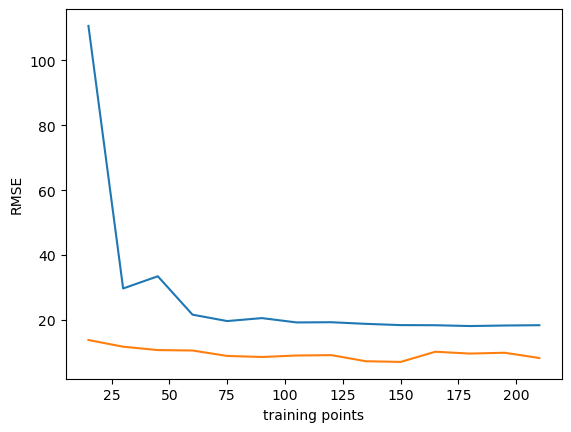

In [68]:
plt.plot(x,np.sqrt(MSE))
plt.xlabel('training points')
plt.ylabel('RMSE')

Text(0, 0.5, '$R^2$')

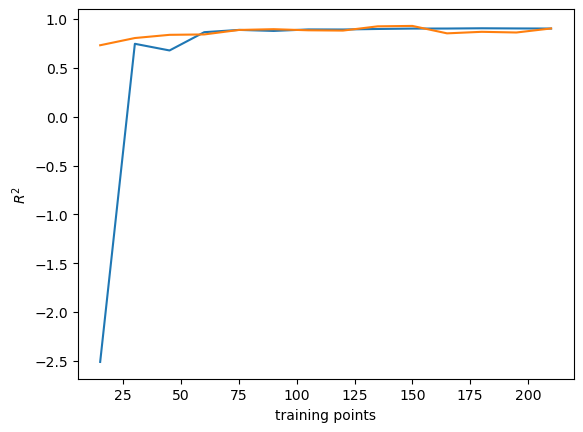

In [69]:
plt.plot(x,R2)
plt.xlabel('training points')
plt.ylabel('$R^2$')

In [70]:
R2

array([[-2.51187056,  0.73176687],
       [ 0.74672096,  0.80571915],
       [ 0.67845277,  0.83850676],
       [ 0.86561003,  0.84254985],
       [ 0.88901162,  0.88849434],
       [ 0.87847468,  0.896341  ],
       [ 0.89370147,  0.88504004],
       [ 0.89302673,  0.88202292],
       [ 0.89852533,  0.92551761],
       [ 0.9026026 ,  0.92976852],
       [ 0.90302418,  0.85367749],
       [ 0.90565315,  0.86942817],
       [ 0.90392812,  0.86241551],
       [ 0.90292799,  0.90382099]])

In [71]:
np.min(np.sum((new_X.iloc[0,6:15]-X_train.iloc[:,6:15])**2,axis=1)/9)

690.3191712402519

In [72]:
X_train

,CV_ventricles,k_ventricles,k_FEC,CV_atria,k_atria,k_BB,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9
18,0.753588,0.218965,6.66704,0.934932,0.485911,3.62187,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667
119,0.413092,0.358445,3.83419,0.413177,0.400741,3.34389,-12.736614,21.287883,-26.606779,-11.191512,-15.641651,-4.939303,27.273309,2.571664,4.259429
178,0.717800,0.230483,1.98188,0.383803,0.208934,2.00442,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667
152,0.439487,0.260363,5.99956,0.370015,0.417268,3.73397,14.528402,16.328970,-5.269040,31.653975,7.173021,17.494031,-1.362727,-2.515712,3.296703
12,0.797582,0.431509,5.91331,0.429039,0.465180,1.91097,80.119501,6.505305,4.707190,18.693887,-17.988034,-9.927770,0.879985,0.066901,2.958833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.748897,0.487695,5.88488,0.499507,0.437950,1.67314,2.227391,21.550335,14.556385,-15.904535,25.680079,8.861413,6.648921,-4.363833,-1.214492
69,0.740682,0.320987,4.13657,0.578485,0.479025,4.23699,-63.220620,18.706703,-6.052930,19.689300,-17.629848,-7.840965,0.999140,-0.757423,-12.277502
53,0.616948,0.205457,5.05144,0.320475,0.480873,4.09542,51.114176,-25.099497,-6.603593,-1.858095,2.108524,6.369323,2.082206,4.801941,-3.926799
104,0.751635,0.361058,2.94095,0.458375,0.217942,3.54476,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667


In [73]:
new_X.iloc[i]

CV_ventricles      0.763617
k_ventricles       0.307374
k_FEC              2.489060
CV_atria           0.415167
k_atria            0.460805
k_BB               5.415530
Mode1            115.841000
Mode2            -55.530600
Mode3            -27.481300
Mode4             40.595900
Mode5             28.098500
Mode6            -14.408400
Mode7            -23.371600
Mode8            -19.021700
Mode9            -13.999300
Name: 13, dtype: float64

In [74]:
GPE_mesh_original.MSE(new_X.iloc[[i]],new_Y.iloc[[i]])

tensor([19410.5497,   140.4269], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [75]:
X_train

,CV_ventricles,k_ventricles,k_FEC,CV_atria,k_atria,k_BB,Mode1,Mode2,Mode3,Mode4,Mode5,Mode6,Mode7,Mode8,Mode9
18,0.753588,0.218965,6.66704,0.934932,0.485911,3.62187,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667
119,0.413092,0.358445,3.83419,0.413177,0.400741,3.34389,-12.736614,21.287883,-26.606779,-11.191512,-15.641651,-4.939303,27.273309,2.571664,4.259429
178,0.717800,0.230483,1.98188,0.383803,0.208934,2.00442,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667
152,0.439487,0.260363,5.99956,0.370015,0.417268,3.73397,14.528402,16.328970,-5.269040,31.653975,7.173021,17.494031,-1.362727,-2.515712,3.296703
12,0.797582,0.431509,5.91331,0.429039,0.465180,1.91097,80.119501,6.505305,4.707190,18.693887,-17.988034,-9.927770,0.879985,0.066901,2.958833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.748897,0.487695,5.88488,0.499507,0.437950,1.67314,2.227391,21.550335,14.556385,-15.904535,25.680079,8.861413,6.648921,-4.363833,-1.214492
69,0.740682,0.320987,4.13657,0.578485,0.479025,4.23699,-63.220620,18.706703,-6.052930,19.689300,-17.629848,-7.840965,0.999140,-0.757423,-12.277502
53,0.616948,0.205457,5.05144,0.320475,0.480873,4.09542,51.114176,-25.099497,-6.603593,-1.858095,2.108524,6.369323,2.082206,4.801941,-3.926799
104,0.751635,0.361058,2.94095,0.458375,0.217942,3.54476,-25.433101,7.377060,16.518874,10.553323,20.454561,-3.834116,8.557983,-6.411704,-8.757667


In [76]:
new_X.shape[0]

277

In [77]:
distance = np.zeros(new_Y.shape[0])
error = np.zeros((new_Y.shape[0],2))
for i in range(new_Y.shape[0]):
    error[i]=GPE_mesh_original.MSE(new_X.iloc[[i]],new_Y.iloc[[i]]).detach().numpy() 
    distance[i] = np.min(np.sum((new_X.iloc[i,6:7]-X_train.iloc[:,6:7])**2,axis=1)/1)

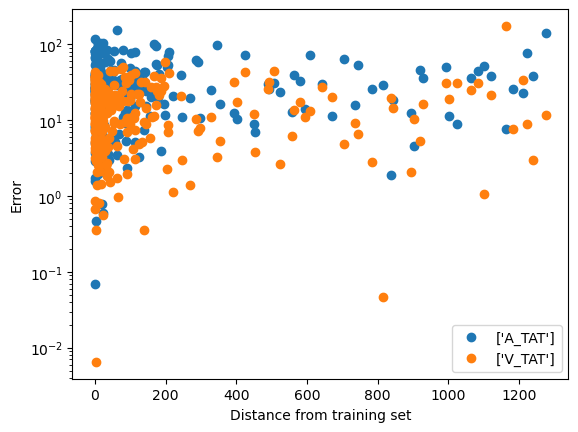

In [79]:
plt.plot(distance,np.sqrt(error),'o')
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('Distance from training set')
plt.legend(y_labels.values)

In [81]:
c_X  = pd.concat([all_input.iloc[:,0:15],new_X])
c_Y  = pd.concat([all_output,new_Y])

In [82]:
c_X_train, c_X_test, c_Y_train, c_Y_test = train_test_split(
    c_X,
    c_Y,
    test_size=0.8,
    random_state=1
)


In [83]:
MSE=np.zeros((int(np.floor(c_Y_train.shape[0]/15)),2))
R2=np.zeros((int(np.floor(c_Y_train.shape[0]/15)),2))
x = np.linspace(15,c_Y_train.shape[0]-c_Y_train.shape[0]%15,int(np.floor(c_Y_train.shape[0]/15)))
for i in range(int(np.floor(c_Y_train.shape[0]/15))):
    N = (i+1)*15
    new_GPE_mesh_original2 = GPE.ensemble(c_X_train.iloc[0:N,0:15],c_Y_train.iloc[0:N,0:15],mean_func="linear",training_iter=500)
    MSE[i]=new_GPE_mesh_original2.MSE(c_X_test.iloc[:,0:15],c_Y_test).detach().numpy()
    R2[i]=new_GPE_mesh_original2.R2(c_X_test.iloc[:,0:15],c_Y_test).detach().numpy()
    #MSE[i]=new_GPE_mesh_original2.MSE(all_input.iloc[:,0:15],all_output).detach().numpy()
    #R2[i]=new_GPE_mesh_original2.R2(all_input.iloc[:,0:15],all_output).detach().numpy()
    print(MSE[i])

0
1
[5622.34294294 1299.64410422]
0
1
[1320.82090853  204.03172088]
0
1
[1024.85873936  129.67890034]
0
1
[404.81837616  90.47900169]
0
1
[269.51715487  79.63412669]
0
1
[203.12445257  52.74343961]
0
1
[167.56490826  48.53876408]
0
1
[157.67225879  51.74552078]
0
1
[129.88803438  46.93492463]
0
1
[115.07460575  46.8751758 ]
0
1
[109.09275303  41.20542583]
0
1
[107.43788516  36.49660083]
0
1
[90.90355129 36.61824209]
0
1
[83.01803585 33.64668605]
0
1
[71.02110069 34.77377365]
0
1
[88.02028017 34.68152755]
0
1
[69.98803313 32.71055572]
0
1
[75.45946762 32.09799222]
0
1
[73.07332251 29.0894498 ]
0
1
[57.0726893  28.24514227]
0
1
[56.2218249  29.79378219]
0
1
[56.49629873 29.81967744]
0
1
[56.3525976  28.19360034]
0
1
[55.43295266 27.45091313]
0
1
[52.04624516 27.56993286]
0
1
[52.00505886 27.46902006]
0
1
[51.52747937 26.33669648]
0
1
[48.75612589 27.29557808]
0
1
[57.97527345 26.894094  ]
0
1
[58.21482151 27.75424088]
0
1
[54.73921281 27.2284264 ]
0
1
[52.70441965 28.23456584]
0
1
[49.84

Text(0, 0.5, 'RMSE')

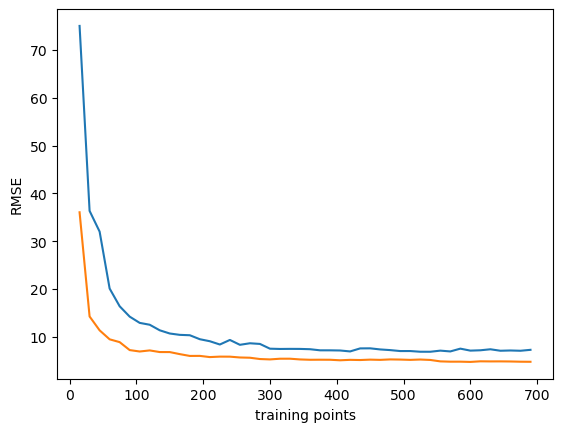

In [84]:
plt.plot(x,np.sqrt(MSE))
plt.xlabel('training points')
plt.ylabel('RMSE')

In [85]:
R2.shape

(46, 2)

Text(0, 0.5, '$R^2$')

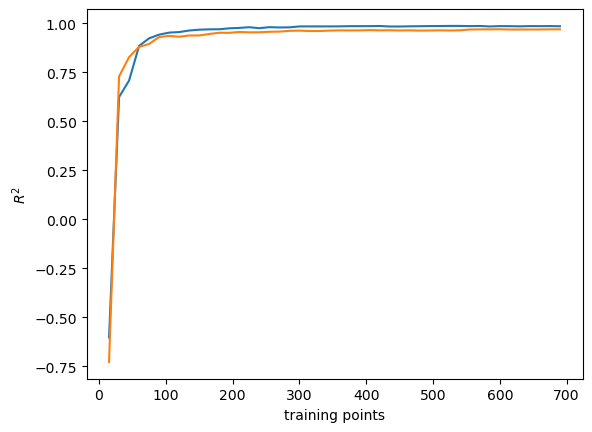

In [86]:
plt.plot(x,R2)
plt.xlabel('training points')
plt.ylabel('$R^2$')

In [87]:
c_GPE_mesh_original = GPE.ensemble(c_X_train,c_Y_train,mean_func="constant",training_iter=500)

0
1


In [88]:
c_GPE_mesh_original.MSE(c_X_test,c_Y_test)

tensor([51.7245, 27.9549], dtype=torch.float64, grad_fn=<MeanBackward1>)

In [89]:
c_GPE_mesh_original.R2(c_X_test,c_Y_test)

tensor([0.9853, 0.9628], dtype=torch.float64, grad_fn=<RsubBackward1>)

In [92]:
distance = np.zeros(c_Y_test.shape[0])
error = np.zeros((c_Y_test.shape[0],2))
for i in range(c_Y_test.shape[0]):
    error[i]=c_GPE_mesh_original.MSE(c_X_test.iloc[[i]],c_Y_test.iloc[[i]]).detach().numpy() 
    distance[i] = np.min(np.sum((c_X_test.iloc[i,6:9]-c_X_train.iloc[:,6:9])**2,axis=1)/3)

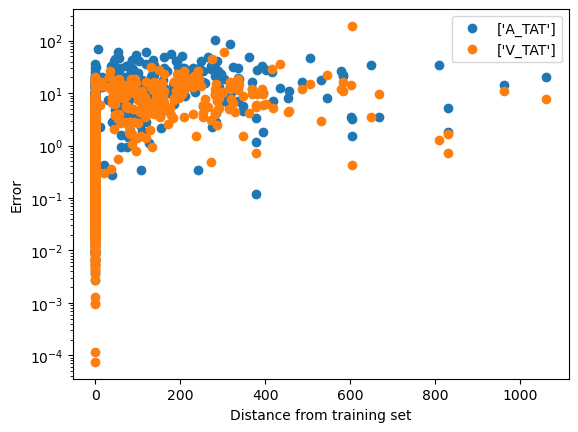

In [93]:
plt.plot(distance,np.sqrt(error),'o')
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('Distance from training set')
plt.legend(y_labels.values)